In [ ]:
# encoding=utf8

# Linear Regression Analysis

In [95]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import plotly.offline as py

In [2]:
#Reading the data
sonar_classification = pd.read_csv("../../DataSets/pybk016master/Ex07_Sonar_Classification.csv")

In [3]:
#Reading the data
sonar_regression = pd.read_csv("../../DataSets/pybk016master/Ex07_Sonar_Regreesion.csv")

In [4]:
#Evaluating the correlation matrix for all vaariables
corr = sonar_regression.corr()

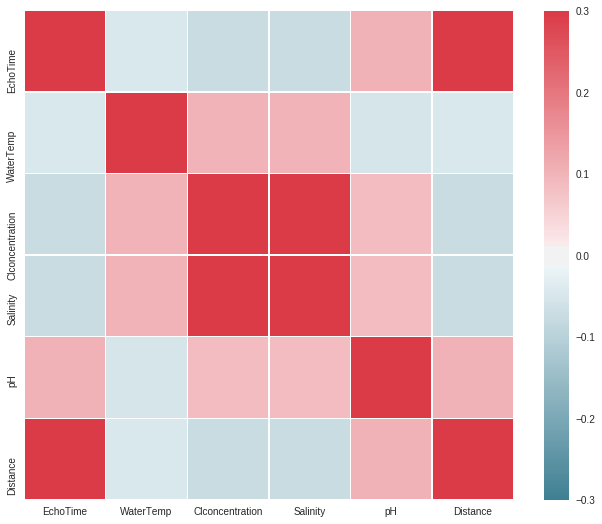

In [5]:
#Plotting the heatmap of the corelation matrix
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, ax=ax)
plt.show()

The above heatmap shows a high corelation between distance and the echotime, also features like pH and Salinity have shown some degree of corelation with the target data 

In [6]:
#Dropping the values which are missing
sonar_regression.dropna(how = 'any', inplace = True)

In [7]:
#Slicing out the feature data
sonar_x = sonar_regression.loc[:,:'pH']

In [8]:
#Slicing out the target variable
sonar_y = sonar_regression.loc[:,'Distance']


In [9]:
#using a train_test_split in-built method to divide the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(sonar_x, sonar_y, test_size = 0.8, random_state=42)

In [10]:
regr = linear_model.LinearRegression(normalize = True)

In [11]:
#Fitting the data via logistic regression
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [12]:
#Finding the coefficient of the line of best fit
coef_train = regr.coef_

In [13]:
coef_train

array([  6.24999513e+02,  -4.84355328e-04,   6.19921363e+10,
        -3.43152065e+10,  -2.31931249e-02])

In [14]:
#Finding the intercept of the line of best fit
int_train = regr.intercept_

In [15]:
int_train

-0.4724228900995513

In [16]:
#Find the mean squared error for test and training data
error_test = ((regr.predict(X_test) - y_test) ** 2)

In [17]:
error_test.mean()

0.00013401532357434069

In [18]:
residuals = (regr.predict(X_train) - y_train)

In [19]:
residuals = np.array(residuals)

In [20]:
plt.boxplot(residuals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4938723470>],
 'caps': [<matplotlib.lines.Line2D at 0x7f493872bf60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49386b68d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f49387319b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4938723e80>,
  <matplotlib.lines.Line2D at 0x7f493872b710>]}

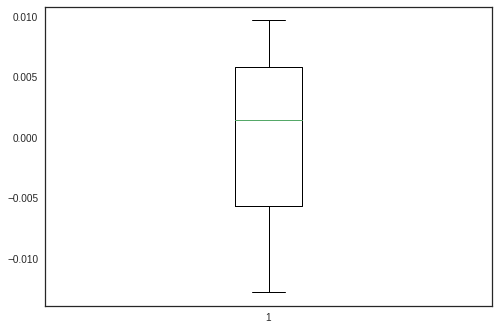

In [21]:
plt.show()

In [22]:
#Finding variance of test and train data
score_test = regr.score(X_test, y_test)

In [23]:
score_test

0.99999999989259392

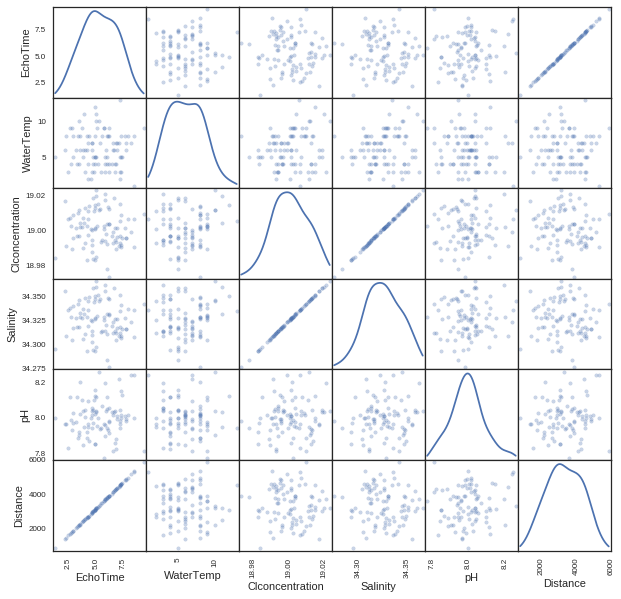

In [24]:
#Plotting the scatter matrix of the original data set to see the trend visually
scatter_matrix(sonar_regression, alpha=0.3, figsize = (10,10), diagonal='kde')
plt.show()


## Normalising datasets and finding the coeffs

In [25]:
#Storing the column names of the original dataset
cols = sonar_regression.columns

In [26]:
#Normalizing the data
sonar_test_1 = preprocessing.normalize(sonar_regression, norm='l2')

In [27]:
sonar_test_1 = pd.DataFrame(sonar_test_1)

In [28]:
sonar_test_1.columns = cols

In [29]:
sonar_x_1 = sonar_test_1.loc[:,:'pH']

In [30]:
sonar_y_1 = sonar_test_1.loc[:,'Distance']

In [31]:
#Splitting the training and test data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(sonar_x_1, sonar_y_1, test_size = 0.8, random_state=42)

In [32]:
#Fitting the data
regr.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [33]:
#Calculating the coeffs
coef_train = regr.coef_

In [34]:
coef_train

array([  5.76260783e+02,  -3.36993539e-04,   5.42383488e+10,
        -3.00231651e+10,  -9.29779278e-03])

In [35]:
error_test_1 = ((regr.predict(X_test_1) - y_test_1) ** 2)

In [36]:
score_test_1 = regr.score(X_test_1, y_test_1)

In [37]:
score_test_1

0.99822029897146114

In [38]:
residuals = np.array((regr.predict(X_test_1) - y_test_1))

In [39]:
plt.boxplot(residuals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4937a01cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4937a05c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4937a08f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4937a08940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4937a01ef0>,
  <matplotlib.lines.Line2D at 0x7f4937a05b00>]}

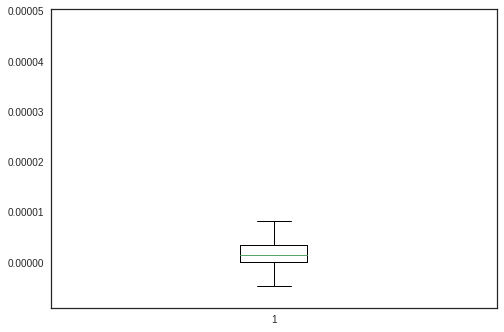

In [40]:
plt.show()

In [41]:
result = sm.ols(formula = "Distance ~ EchoTime + WaterTemp + Clconcentration + Salinity + pH", data = sonar_regression).fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.810e+11
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        10:55:48   Log-Likelihood:                 298.23
No. Observations:                  91   AIC:                            -586.5
Df Residuals:                      86   BIC:                            -573.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0715      1.825     

## Feature Extraction

In [43]:
#Slicing data relating to prominent features
sonar_feature_x = sonar_regression.loc[:,{'EchoTime', 'pH'}]

In [44]:
#Slicing data relating to target
sonar_feature_y = pd.DataFrame(sonar_regression.loc[:,'Distance'])

In [45]:
#Slicing data relating to prominent features and target
sonar_feature = sonar_regression.loc[:,{'EchoTime', 'pH','Distance'}]

In [46]:
#Slicing the data for train and test
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(sonar_feature_x, sonar_feature_y, test_size = 0.8, random_state=42)

In [47]:
#Fiitin the training data
regr.fit(X_train_feat, y_train_feat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [48]:
#Getting the coeffs for feature variables
regr.coef_

array([[  6.24999330e+02,  -2.31716128e-02]])

In [49]:
#getting the variance of the distribution
score_test_feat_1 = regr.score(X_test_feat, y_test_feat)

In [50]:
score_test_feat_1

0.99999999991172039

In [51]:
#Calculating the error from observed value
error_test_feat = ((regr.predict(X_test_feat) - y_test_feat) ** 2)

In [52]:
error_test_feat.mean()

Distance    0.00011
dtype: float64

In [53]:
residuals = np.array((regr.predict(X_test_feat) - y_test_feat))

In [54]:
plt.boxplot(residuals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f493794e9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4937954e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f493795fe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4937958ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f493794ec50>,
  <matplotlib.lines.Line2D at 0x7f4937954c50>]}

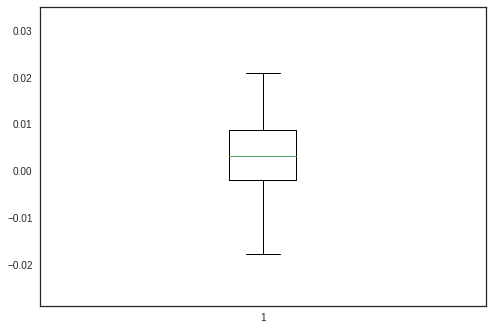

In [55]:
plt.show()

In [56]:
#Implementing via OLS
result_feat = sm.ols(formula = "Distance ~ EchoTime + pH", data = sonar_feature).fit()

In [57]:
print(result_feat.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.469e+11
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        10:55:50   Log-Likelihood:                 295.95
No. Observations:                  91   AIC:                            -585.9
Df Residuals:                      88   BIC:                            -578.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0904      0.080      1.136      0.2

## Feature Extraction- Using only EchoTime to predict distance

In [58]:
#Slicing data relating to prominent features
sonar_feature_x = sonar_regression.loc[:,{'EchoTime'}]

In [59]:
#Slicing data relating to target
sonar_feature_y = pd.DataFrame(sonar_regression.loc[:,'Distance'])

In [60]:
#Slicing data relating to prominent features and target
sonar_feature = sonar_regression.loc[:,{'EchoTime','Distance'}]

In [61]:
#Slicing the data for train and test
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(sonar_feature_x, sonar_feature_y, test_size = 0.8, random_state=42)

In [62]:
#Fiitin the training data
regr.fit(X_train_feat, y_train_feat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [63]:
#Getting the coeffs for feature variables
regr.coef_


array([[ 624.9993033]])

In [64]:
regr.intercept_

array([ 0.00808826])

In [65]:
#getting the variance of the distribution
score_train_feat_1 = regr.score(X_train_feat, y_train_feat)

In [66]:
score_train_feat_1

0.99999999986094179

In [67]:
#Calculating the error from observed value
error_test_feat = ((regr.predict(X_test_feat) - y_test_feat) ** 2)

In [68]:
error_test_feat.mean()

Distance    0.000109
dtype: float64

In [69]:
residuals = np.array((regr.predict(X_test_feat) - y_test_feat))

In [70]:
plt.boxplot(residuals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f49378bfe10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f49378cb940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49378d1be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f49378d1390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f49378bffd0>,
  <matplotlib.lines.Line2D at 0x7f49378c6fd0>]}

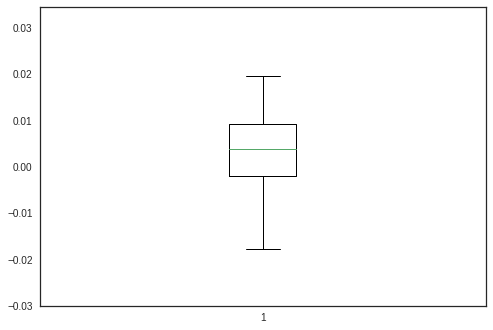

In [71]:
plt.show()

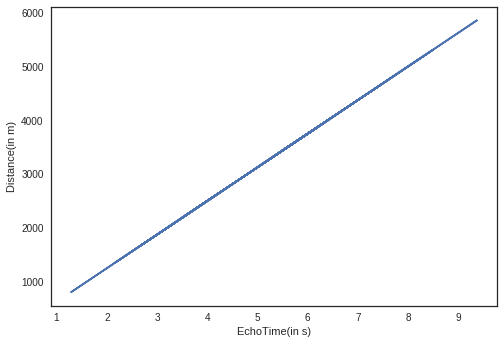

In [72]:
plt.plot(X_test_feat,(regr.predict(X_test_feat)))
plt.xlabel('EchoTime(in s)')
plt.ylabel('Distance(in m)')
plt.show()

In [73]:
#Implementing via OLS
result_feat = sm.ols(formula = "Distance ~ EchoTime ", data = sonar_feature).fit()

In [74]:
print(result_feat.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.091e+12
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        10:55:52   Log-Likelihood:                 295.30
No. Observations:                  91   AIC:                            -586.6
Df Residuals:                      89   BIC:                            -581.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.003      0.408      0.6

## Hypothesis Testing

In [75]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result_feat.resid, result_feat.model.exog)
list(zip(name,test))

[('F statistics', 1.078392337313), ('p_value', 0.40182983432198777)]

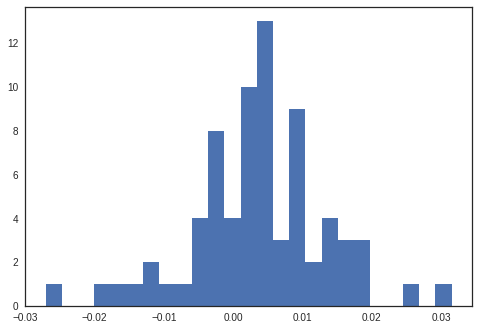

In [76]:
plt.hist(residuals, bins=25)
plt.show()

## Ridge Regression

In [77]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [78]:
#Slicing out the feature data
sonar_x = sonar_regression.loc[:,:'pH']

In [79]:
#Slicing out the target variable
sonar_y = sonar_regression.loc[:,'Distance']

In [80]:
#using a train_test_split in-built method to divide the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(sonar_x, sonar_y, test_size = 0.8, random_state=42)

In [81]:
X_train.shape

(18, 5)

In [82]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 5)

In [92]:
coefs_df = pd.DataFrame(coefs, columns=sonar_x.columns.values)
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df.head()


,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Alpha
0,1.249999e-07,1.043550e-08,-0.000003,-0.000002,1.126835e-08,5.000000e+09
1,1.652425e-07,1.379512e-08,-0.000004,-0.000002,1.489610e-08,3.782317e+09
2,2.184408e-07,1.823634e-08,-0.000005,-0.000003,1.969177e-08,2.861184e+09
3,2.887659e-07,2.410736e-08,-0.000007,-0.000004,2.603136e-08,2.164381e+09
4,3.817315e-07,3.186852e-08,-0.000009,-0.000005,3.441192e-08,1.637275e+09


In [115]:
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.EchoTime,
    name = 'EchoTime',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.WaterTemp,
    name = 'WaterTemp',
    
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Clconcentration,
    name = 'Clconcentration',
    
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Salinity,
    name = 'Salinity',
   
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.pH,
    name = 'pH',
    
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)

data1 = [trace0, trace1, trace2, trace3, trace4]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
py.plot(fig)

'file:///home/user/assign2/DataSets/temp-plot.html'

'file:///home/user/assign2/DataSets/temp-plot.html'

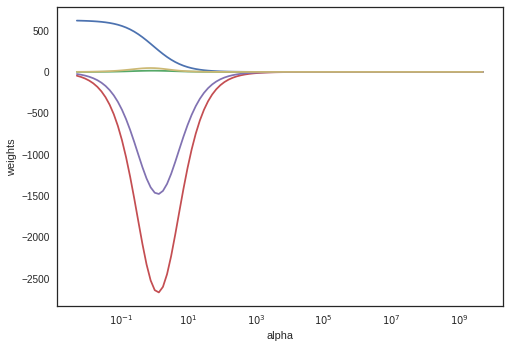

In [83]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [84]:
ridge2 = Ridge(alpha=.005, normalize=True)
ridge2.fit(X_train, y_train)
# Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=sonar_x.columns))
# Print coefficients
print(mean_squared_error(y_test, pred2))
# Calculate the test MSE

EchoTime           621.400999
WaterTemp            0.337987
Clconcentration    -45.945593
Salinity           -25.432782
pH                   1.090053
dtype: float64
43.31751702


In [85]:
ridgecv = RidgeCV(alphas=alphas, scoring = 'mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was 

0.0050000000000000001

## Lasso

In [86]:
lasso = Lasso(max_iter=10000, normalize=True)
coeffs = []

In [87]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)

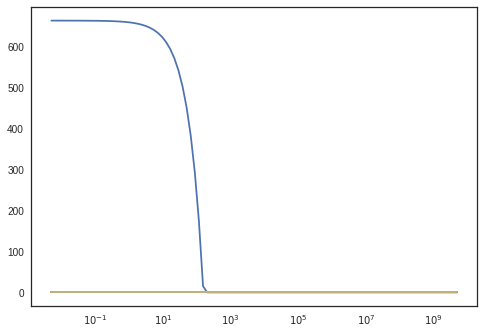

In [88]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')

plt.show()

In [104]:
pd.Series(lasso.coef_, index = X_test.columns)

EchoTime           663.024291
WaterTemp            0.000000
Clconcentration     -0.000000
Salinity            -0.000000
pH                  -0.000000
dtype: float64